# Model Selection

In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

%matplotlib inline 
pd.options.display.precision = 4
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)

### Read in your pickled dataframes from Notebook 1

In [38]:
features = pd.read_pickle('features.pickle')
target = pd.read_pickle('target.pickle')

### One-Hot Encode Categorical Variables

In [39]:
# they are already encoded from part 1

# Model Selection

Next, you will build a series of models. 

## Option 1:

Pull in your deskewed pickle from notebook 1

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model

Two for Prediction:
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

## Option 2:

Get a dataframe that has not yet been deskewed.

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model
1. (optional) use a Dummy Regressor

Four for Prediction:
1. a deskewed, scaled Grid-Searched KNN
1. a deskewed, scaled Tree-like Model
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

Calculate Mean Test Scores on each the benchmarking and prediction models and present an analysis on these models. 

<div style="float: left">
<img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUChOTsxJVdC1U1D39vNTUDa0UojJCwaJpQAZAc6O6taYioxAihTgqtyLMlN0g1MTi5IzgHygCjQ9IUWpqbo5mdmpCsrG-HSC1AG11gIABDUwYQ" width=380px style="float: left"><img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUEhJLc5OLVfQtVMoTk7MSbUGCoEZIBF1bz8_BWUTK4WYPBewstQUhWCQZApQJMDZUR2LalMU1Qjl7kWZKbrBqYlFyRlAPlApmuaQotRU3ZzM7FQFZTOijABpAJpRCwCkXUAJ" width=500px style="float: left">
</div>

Use this template:

        gs_params = {}
        model_1 = GridSearchCV(ModelClass(), cv=5,
                               param_grid=gs_params)
        model_1.fit(X_set, y_train)
        display(pd.DataFrame(model_1.cv_results_))
        print(model_1.cv_results_['mean_test_score'])

In [40]:
from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [41]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .3, random_state = 42)

## Benchmarking model using DummyRegressor

In [42]:
from sklearn.dummy import DummyRegressor

In [43]:
dr = DummyRegressor()
dr.fit(X_train, y_train)
print("Train score: {:.4f}".format(dr.score(X_train, y_train)))
print("Test score: {:.4f}".format(dr.score(X_test, y_test)))

Train score: 0.0000
Test score: -0.0017


## Benchmarking model 1: KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knr = KNeighborsRegressor()

In [46]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [47]:
print("Train score: {:.4f}".format(knr.score(X_train, y_train)))
print("Test score: {:.4f}".format(knr.score(X_test, y_test)))

Train score: 0.7754
Test score: 0.6032


## Benchmarking Model 2: Tree-like

In [48]:
dtr = DecisionTreeRegressor()

In [49]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
print("Train score: {:.4f}".format(dtr.score(X_train, y_train)))
print("Test score: {:.4f}".format(dtr.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.6807


## Prediction Model 1: deskewed, scaled Grid-Searched KNN


In [51]:
# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {
   # 'n_neighbors':[1,5,10,15]
}

In [54]:
gs_knr = GridSearchCV(KNeighborsRegressor(), param_grid=params)

In [55]:
gs_knr.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
gs_knr.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
gs_knr_df = pd.DataFrame(gs_knr.cv_results_)

In [58]:
gs_knr_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0056,0.0871,0.7097,0.8121,{},1,0.7474,0.7992,0.7046,0.8216,0.677,0.8155,0.0008,0.0002,0.029,0.0095


In [59]:
print("Train score: {:.4f}".format(gs_knr.score(X_train_scaled, y_train)))
print("Test score: {:.4f}".format(gs_knr.score(X_test_scaled, y_test)))

Train score: 0.8166
Test score: 0.7242


## Prediction Model 2: deskewed, scaled Tree-like Model

In [60]:
dtr_scaled = DecisionTreeRegressor()

In [61]:
dtr_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [62]:
print("Train score: {:.4f}".format(dtr_scaled.score(X_train_scaled, y_train)))
print("Test score: {:.4f}".format(dtr_scaled.score(X_test_scaled, y_test)))

Train score: 1.0000
Test score: 0.6706


## Model Complexity Evaluation

1. Train a grid searched Decision Tree using a range of `max_depth`. 
1. Obtain the `cv_results_` from the `GridSearchCV` object.
1. Prepare a plot of `mean_train_score` against `max_depth` and `mean_test_score` against `max_depth` on the same plot. 

In [63]:
params = {
    'max_depth':list(range(1,20)),
}

gs_dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5)

In [64]:
gs_dtr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
gs_dtr.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [66]:
gs_dtr.best_estimator_.max_depth

8

In [67]:
cv_results_df = pd.DataFrame(gs_dtr.cv_results_)

In [68]:
cv_results_df.head(2)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0041,0.0005,0.3379,0.3774,1,{'max_depth': 1},19,0.3990,0.3633,0.3093,...,0.3358,0.3855,0.2456,0.3862,0.3996,0.3646,0.0005,4.8299e-05,0.0581,0.0110
1,0.0052,0.0005,0.5029,0.5864,2,{'max_depth': 2},18,0.5021,0.5851,0.5062,...,0.5353,0.5909,0.4067,0.5951,0.5641,0.5758,0.0002,3.9918e-05,0.0530,0.0065


In [69]:
print("Train score: {:.4f}".format(gs_dtr.score(X_train_scaled, y_train)))

print("Test score: {:.4f}".format(gs_dtr.score(X_test_scaled, y_test)))

Train score: 0.9603
Test score: 0.7281


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


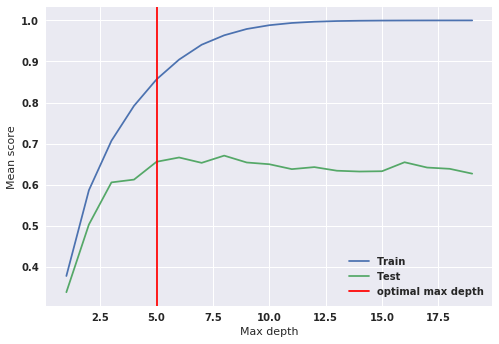

In [70]:
plt.plot(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], label='Train')
plt.plot(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], label="Test")
plt.axvline(5, label="optimal max depth", c='r')
plt.xlabel('Max depth')
plt.ylabel('Mean score')
plt.legend()
plt.show()

### Analysis

Considering this model complexity plot, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?

#### As max depth increases, the training error decreases (the model fits the training data better and better), while the testing error decreases up to a max depth of about 5 at which point it plateaus. The max depth of 5 results in a model that best generalizes because it minimizes the testing error while not overfitting to the training data.

What is the grid search algorithm and when is it applicable? What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

#### Grid search is a way to tune the model's hyperparameters to improve its performance, by trying all possible combinations of the model's parameters. 
#### Cross-validation creates multiple train-test splits in the data with different train and test sets for each iteration (fold) of the cv. It helps the model generalize to a variety of cases and allows us to see how the model will actually perform on data is has not learned. 

### Prediction

Choose a model you have developed in this workbook that you believe will best generalize. Provide a statement here as to why you think it will generalize best. Pickle the model and upload to github along with this notebook.

$$\begin{array}{c|c|c|} 
 & \text{DummyRegressor} & \text{KNeighborsRegressor} 
 & \text{DecisionTreeRegressor} & \text{GridSearchCV(KNeighborsRegressor)}
  & \text{DecisionTreeRegressor (scaled)} & \text{GridSearchCV(DecisionTreeRegressor)}
 \\ \hline
\text{Train Score} & 0.00 & 0.78 & 1.00 & 0.82 & 1.00 & 1.00\\ \hline
\text{Test Score} & -0.00 & 0.60 & 0.68 & 0.72 & 0.69 & 0.70\\ \hline
\end{array}$$

#### best model: GridSearchCV(KNeighborsRegressor)
#### This model will generalize the best because it does not overfit to the training data, while the test score is the highest with the least difference between the training and test scores.

In [72]:
import pickle
pickle.dump(gs_knr, open('gs_knr.p', 'wb'))